In [3]:
pip install biopython

## Using Chaos game representation

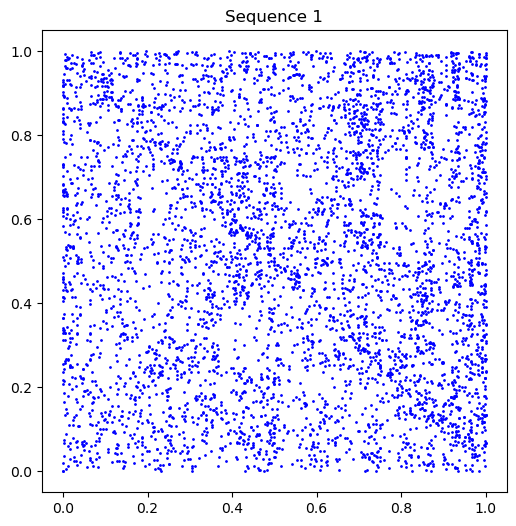

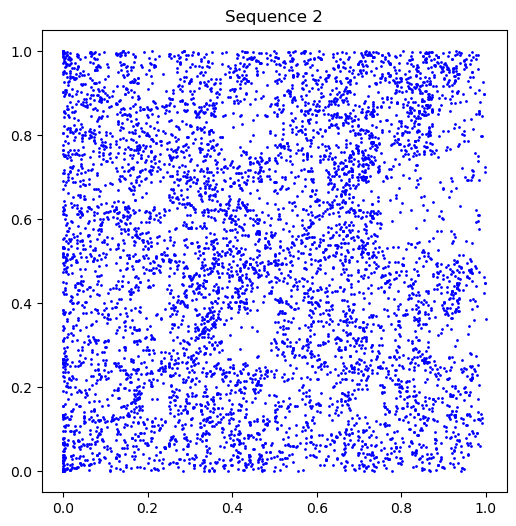

Similarity between the sequences: 0.26
Difference percentage between the sequences: 74.11%


In [17]:
from Bio import SeqIO
import matplotlib.pyplot as plt

def chaos_game_representation(sequence, title):
    x, y = 0, 0
    points = [(0, 0)]
    mapping = {'A': (0, 0), 'C': (1, 0), 'G': (1, 1), 'T': (0, 1)}

    for base in sequence:
        x = (x + mapping[base][0]) / 2
        y = (y + mapping[base][1]) / 2
        points.append((x, y))

    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.scatter(*zip(*points), s=1, color='blue')
    plt.show()

def calculate_similarity(seq1, seq2):
    similarity = sum(1 for base1, base2 in zip(seq1, seq2) if base1 == base2) / len(seq1)
    return similarity

file_path = 'D:\AMRITA\Sem3\BIO\FPR1_SSTR1_gene.fasta'  
sequences = list(SeqIO.parse(file_path, 'fasta'))

sequence1 = str(sequences[0].seq)
sequence2 = str(sequences[1].seq)

chaos_game_representation(sequence1, 'Sequence 1')
chaos_game_representation(sequence2, 'Sequence 2')

similarity = calculate_similarity(sequence1, sequence2)
print(f"Similarity between the sequences: {similarity:.2f}")

difference_percentage = calculate_difference_percentage(sequence1, sequence2)
print(f"Difference percentage between the sequences: {difference_percentage:.2f}%")

## AT Skew

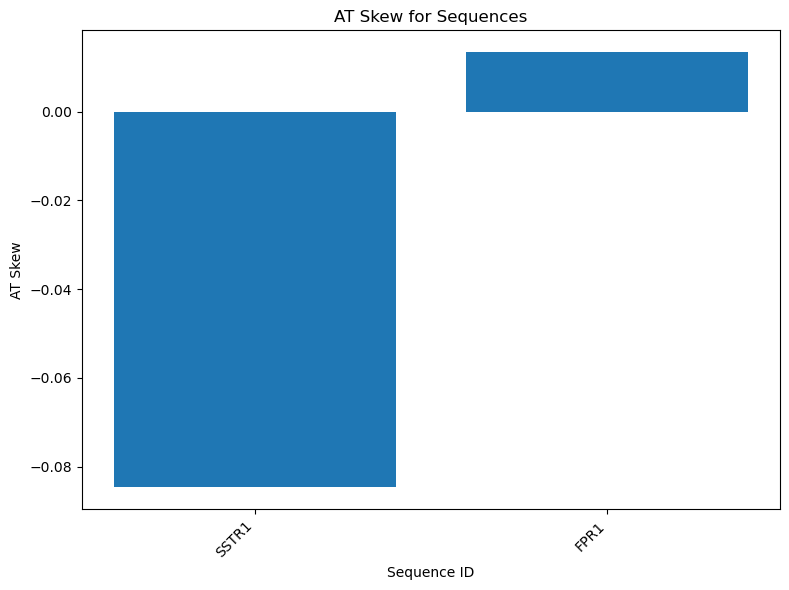

AT skew for sequence SSTR1: -0.0847
AT skew for sequence FPR1: 0.0134


In [2]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_at_skew(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    return (a_count - t_count) / (a_count + t_count)

file_path = 'D:\AMRITA\Sem3\BIO\FPR1_SSTR1_gene.fasta' 
sequences = {}
skew_values = []  

for record in SeqIO.parse(file_path, "fasta"):
    sequences[record.id] = str(record.seq)
    at_skew = calculate_at_skew(str(record.seq))
    skew_values.append(at_skew)
    
plt.figure(figsize=(8, 6))
plt.bar(range(len(sequences)), skew_values, tick_label=list(sequences.keys()))
plt.xlabel('Sequence ID')
plt.ylabel('AT Skew')
plt.title('AT Skew for Sequences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for seq_id, sequence in sequences.items():
    at_skew = calculate_at_skew(sequence)
    print(f"AT skew for sequence {seq_id}: {at_skew:.4f}")


# afsd

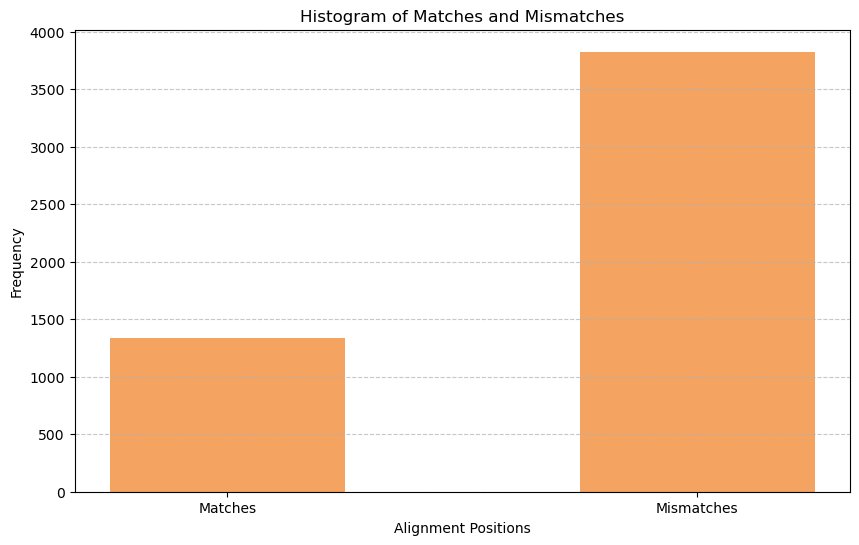

In [15]:
from Bio import pairwise2
from Bio import SeqIO
import matplotlib.pyplot as plt

def read_fasta(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for record in SeqIO.parse(file, "fasta"):
            sequences.append(str(record.seq))
    return sequences

file_path = 'D:\AMRITA\Sem3\BIO\FPR1_SSTR1_gene.fasta'
sequences = read_fasta(file_path)

# Perform Smith-Waterman alignment
alignments = pairwise2.align.localms(
    sequences[0],  
    sequences[1],  
    2,  # Match score
    -1,  # Mismatch penalty
    -1,  # Gap opening penalty
    -0.5,  # Gap extension penalty
    score_only=True  # Return alignment score only
)

differences = [1 if seq1 != seq2 else 0 for seq1, seq2 in zip(sequences[0], sequences[1])]

plt.figure(figsize=(10, 6))
plt.hist(differences, bins=range(3), align='left', rwidth=0.5, color='sandybrown')
plt.xticks([0, 1], ['Matches', 'Mismatches'])
plt.xlabel('Alignment Positions')
plt.ylabel('Frequency')
plt.title('Histogram of Matches and Mismatches')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

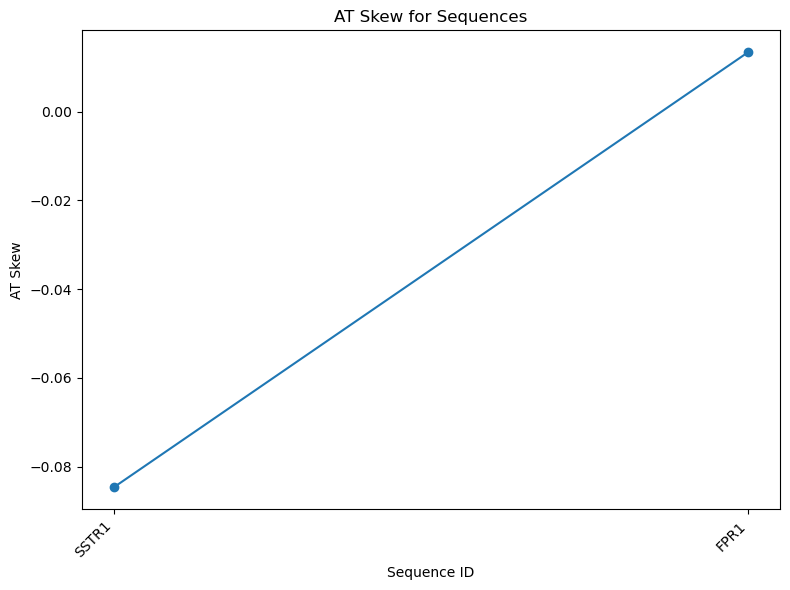

AT skew for sequence SSTR1: -0.0847
AT skew for sequence FPR1: 0.0134


In [3]:
from Bio import SeqIO
import matplotlib.pyplot as plt

def calculate_at_skew(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    return (a_count - t_count) / (a_count + t_count)

file_path = 'D:\AMRITA\Sem3\BIO\FPR1_SSTR1_gene.fasta' 
sequences = {}
skew_values = []  

for record in SeqIO.parse(file_path, "fasta"):
    sequences[record.id] = str(record.seq)
    at_skew = calculate_at_skew(str(record.seq))
    skew_values.append(at_skew)
    
plt.figure(figsize=(8, 6))
plt.plot(range(len(sequences)), skew_values, marker='o')
plt.xlabel('Sequence ID')
plt.ylabel('AT Skew')
plt.title('AT Skew for Sequences')
plt.xticks(range(len(sequences)), list(sequences.keys()), rotation=45, ha='right')
plt.tight_layout()
plt.show()

for seq_id, sequence in sequences.items():
    at_skew = calculate_at_skew(sequence)
    print(f"AT skew for sequence {seq_id}: {at_skew:.4f}")


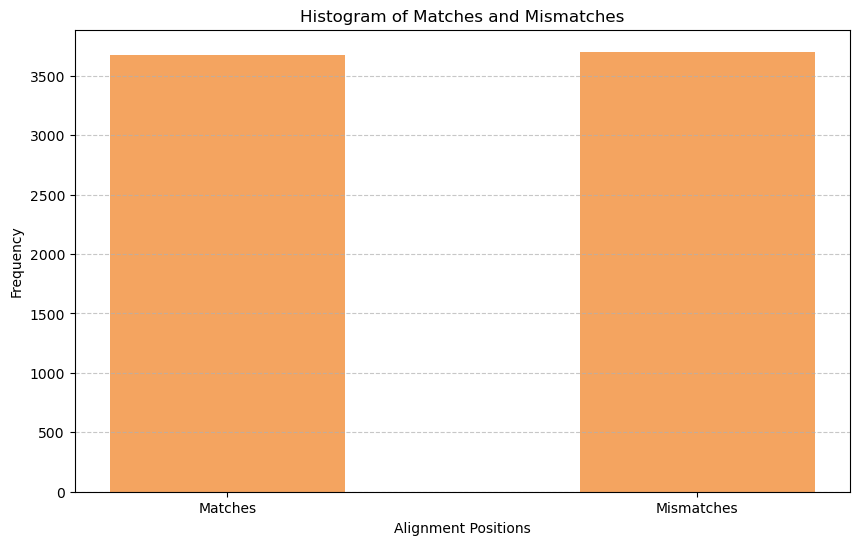

In [5]:
from Bio import pairwise2
from Bio import SeqIO
import matplotlib.pyplot as plt

def read_fasta(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for record in SeqIO.parse(file, "fasta"):
            sequences.append(str(record.seq))
    return sequences

file_path = 'D:\\AMRITA\\Sem3\\BIO\\FPR1_SSTR1_gene.fasta'
sequences = read_fasta(file_path)

# Perform Smith-Waterman alignment
alignments = pairwise2.align.localms(
    sequences[0],
    sequences[1],
    2,  # Match score
    -1,  # Mismatch penalty
    -1,  # Gap opening penalty
    -0.5,  # Gap extension penalty
    score_only=False  # Return alignments, not just score
)

# Retrieve the first alignment object
alignment = alignments[0]

# Compute differences between aligned sequences
differences = [1 if seq1 != seq2 else 0 for seq1, seq2 in zip(alignment.seqA, alignment.seqB)]

plt.figure(figsize=(10, 6))
plt.hist(differences, bins=range(3), align='left', rwidth=0.5, color='sandybrown')
plt.xticks([0, 1], ['Matches', 'Mismatches'])
plt.xlabel('Alignment Positions')
plt.ylabel('Frequency')
plt.title('Histogram of Matches and Mismatches')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
